In [15]:
import torch.nn as nn
import torch

1.conv2d函数详细解释可以看这个链接https://blog.csdn.net/qq_37541097/article/details/102926037?spm=1001.2014.3001.5502

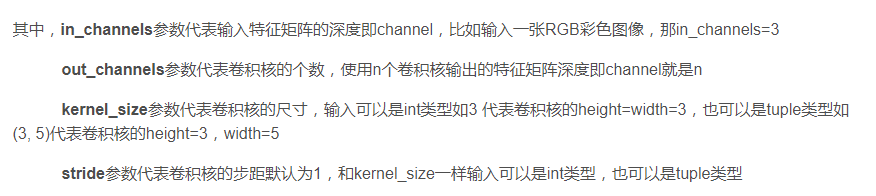

2.alexnet网络结构代码

In [16]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=1000, init_weights=False):
        super(AlexNet, self).__init__()
        # 提取图像特征部分，所以这部分取名为features
        self.features = nn.Sequential( # Sequential将一系列的层结构打包成新的结构，这里取名为features
            # 卷积核个数out_channels不是原网络的98，而是48以减少运算，in_channels为3因为是彩色图像
            nn.Conv2d(3, 48, kernel_size=11, stride=4, padding=2),  # input[3, 224, 224]  output[48, 55, 55]
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),                  # output[48, 27, 27]
            nn.Conv2d(48, 128, kernel_size=5, padding=2),           # output[128, 27, 27]
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),                  # output[128, 13, 13]
            nn.Conv2d(128, 192, kernel_size=3, padding=1),          # output[192, 13, 13]，stride如果不写的话，默认是1
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 192, kernel_size=3, padding=1),          # output[192, 13, 13]
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 128, kernel_size=3, padding=1),          # output[128, 13, 13]
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),                  # output[128, 6, 6]
        )
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5),                                      # p代表随机失活的比例，以0.5的概率消除节点（失活神经元）
            nn.Linear(128 * 6 * 6, 2048),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(2048, 2048),                                  # 因为上一层有2048个结点，所以这里输入是2048
            nn.ReLU(inplace=True),
            nn.Linear(2048, num_classes),                           # 输入是num_classes，即数据集分类的类别数
        )
        # 如果传入参数init_weights，则调用初始化权重函数，如果不传入，则默认不初始化权重
        # 这里只是讲解下自己写的时候初始化权重的方法，如果不初始化，默认会使用何恺明初始化
        if init_weights:
            self._initialize_weights()

3.参数padding除了可以传入int类型的数字，还可以设置为tuple类型，如下图

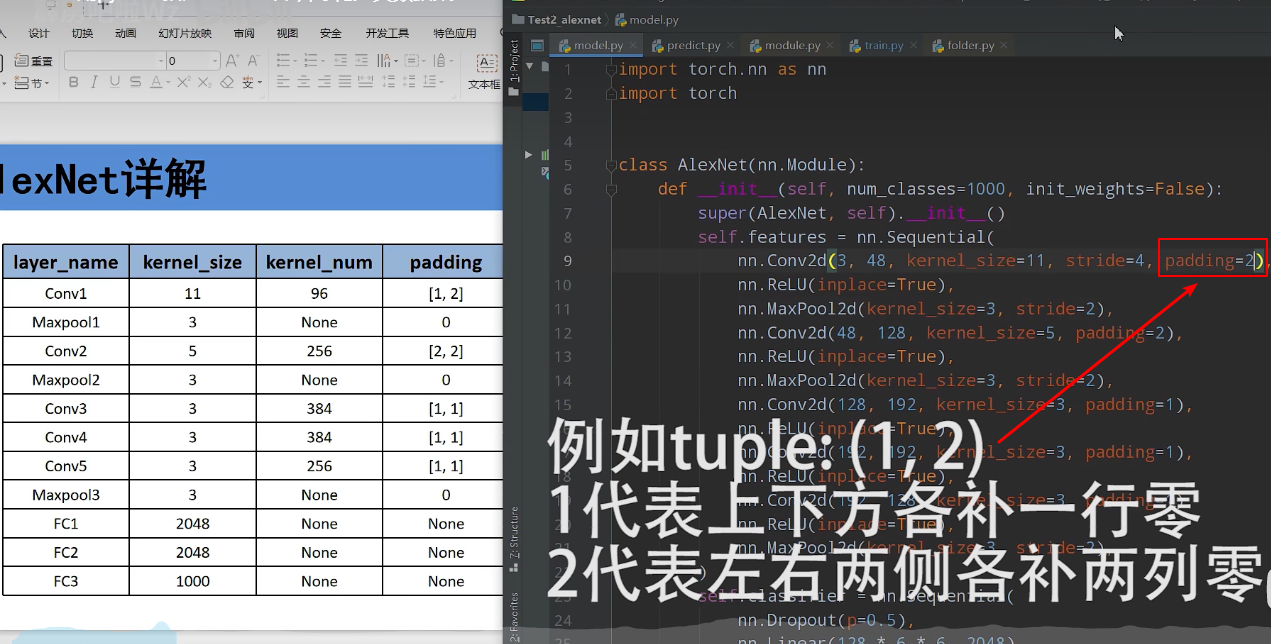

4.也可以使用下图官方给的ZeroPad2d方法进行更精细的设置

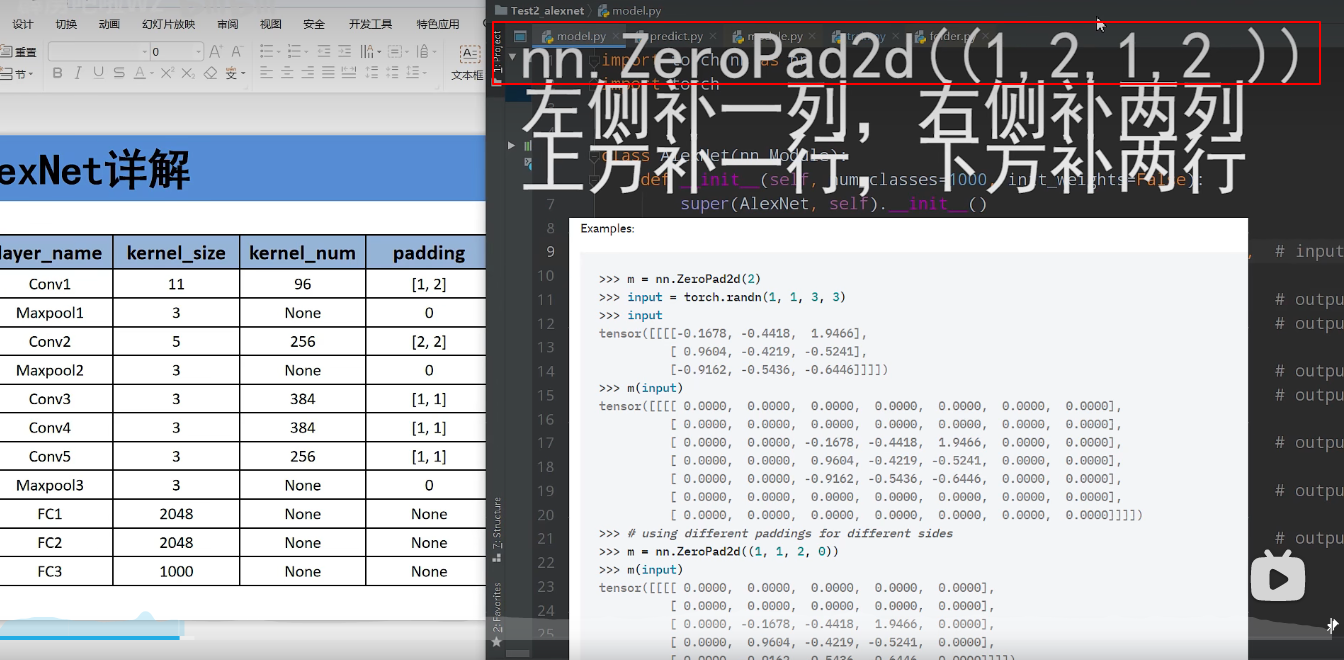

In [19]:
    # 定义正向传播过程，forward函数
    def forward(self, x): # x代表输入图像
        x = self.features(x) # 先对x进行特征提取
        x = torch.flatten(x, start_dim=1) # 得到输出的特征图之后进行展平处理，start_dim的含义是从第一个维度展平（三个维度，分别是channel,width,height）
        x = self.classifier(x) # 然后是全连接层部分（分类）
        return x
    
    # 初始化权重函数
    def _initialize_weights(self):
        # 遍历self.modules
        for m in self.modules():
            if isinstance(m, nn.Conv2d): # 判断每一个层结构是否为卷积层
                # 如果是卷积层，则使用kaiming_normal_方法对该层网络权重初始化
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    # 如果该层的偏置不为None，则初始化为0
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                # 如果是全连接层，则使用normal_方法（正态分布）进行权重初始化，均值0，方差0.01
                nn.init.normal_(m.weight, 0, 0.01)
                # 初始化该层的偏置为0
                nn.init.constant_(m.bias, 0)
